In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from numpy import array
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


### This tells us that the data is from 27 May 2015 to 22 May 2020

In [5]:
df1=df.reset_index()['close']

### Preicting the closing price

In [6]:
df1

,close
0,132.045
1,131.780
2,130.280
3,130.535
4,129.960
...,...
1253,314.960
1254,313.140
1255,319.230
1256,316.850


### Original Data

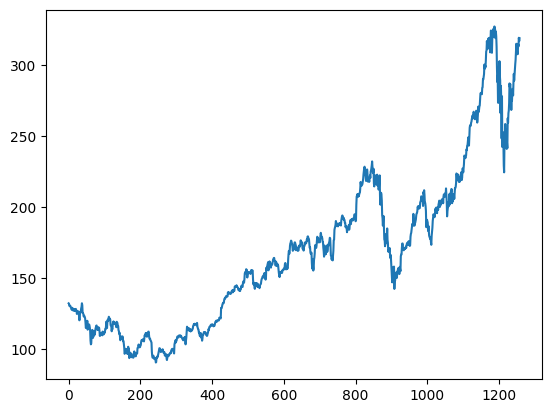

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

### Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


### Manual splitting because the data should be seperated by days and no shuffling must be done.

In [10]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [11]:
training_size,test_size

(817, 441)

In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----149 indexes
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0]) ### 150 th index
	return np.array(dataX), np.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(666, 150)
(666,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(290, 150)
(290,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Stacked LSTM model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 150, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 150, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - loss: 0.0480 - val_loss: 0.0165
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0050 - val_loss: 0.0209
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0014 - val_loss: 0.0056
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0010 - val_loss: 0.0041
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 6.9954e-04 - val_loss: 0.0041
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 7.1524e-04 - val_loss: 0.0044
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 5.9203e-04 - val_loss: 0.0038
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 5.9489e-04 - val_loss: 0.0041
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.8367e-04 - val_loss: 0.0040
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.6750e-04 - val_loss: 0.0037
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.6388e-04 - val_loss: 0.0036
Epoch 12/100
11/11 ━━━━

In [21]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [22]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
import math
from sklearn.metrics import mean_squared_error
### Train data RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

142.0717592879878

In [24]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

243.5857242068715

## Plotting the original and predicted line

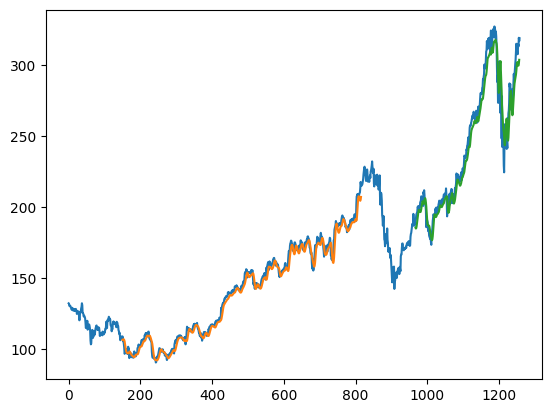

In [25]:
# shift train predictions for plotting
look_back=150
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Preparing the last known data for prediction (using last 150 values)

In [26]:
x_input=test_data[291:].reshape(1,-1) # test_data was of size 441
x_input.shape

(1, 150)

In [27]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist() # flatten into a list of 150 values

## Predicting future 50 days

In [28]:
lst_output=[]
n_steps=150
i=0
while(i < 50):
    if(len(temp_input) > 150):
        x_input = np.array(temp_input[1:])       # drop the oldest value to keep window size = 150
        x_input = x_input.reshape(1, -1)         # reshape to (1, 150)
        x_input = x_input.reshape((1, n_steps, 1))  # reshape to LSTM format: (1, 150, 1)
        yhat = model.predict(x_input, verbose=0)  # predict next value
        temp_input.extend(yhat[0].tolist())       # append prediction to input list
        temp_input = temp_input[1:]               # maintain window size of 150
        lst_output.extend(yhat.tolist())          # store the prediction
        i += 1

    else:
        x_input = x_input.reshape((1, n_steps,1)) #only for first iteration when input data is not greater than 150 values yet
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9242855]
151
[[0.9242854714393616], [0.9237728118896484], [0.9151978492736816], [0.9030358195304871], [0.8905050158500671], [0.8793717622756958], [0.8704199194908142], [0.8638873100280762], [0.8597097992897034], [0.8576291799545288], [0.8572465181350708], [0.8580654859542847], [0.8595443367958069], [0.8611511588096619], [0.8624173402786255], [0.8629798889160156], [0.8626090884208679], [0.8612180352210999], [0.8588544726371765], [0.8556784391403198], [0.8519295454025269], [0.8478876948356628], [0.8438363075256348], [0.8400278687477112], [0.8366596698760986], [0.8338572978973389], [0.8316702842712402], [0.8300755023956299], [0.8289890289306641], [0.8282827138900757], [0.827803373336792], [0.8273929357528687], [0.8269054889678955], [0.82622230052948], [0.8252618312835693], [0.8239836692810059], [0.8223885297775269], [0.8205132484436035], [0.8184221982955933], [0.816196620464325], [0.8139239549636841], [0.8116867542266846], [0.8095550537109375], [0.8075790405273438], [0.8057869672775269

### Plotting 50 days prediction along with original data

In [29]:
day_new=np.arange(1,151)
day_pred=np.arange(151,201)

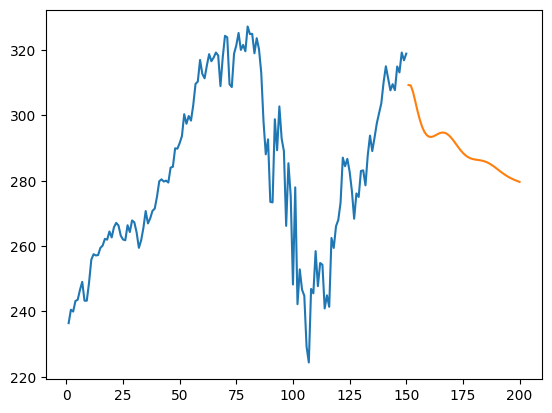

In [31]:
plt.plot(day_new,scaler.inverse_transform(df1[1108:])) #original data
plt.plot(day_pred,scaler.inverse_transform(lst_output)) #predictions

### Combined scaled plot

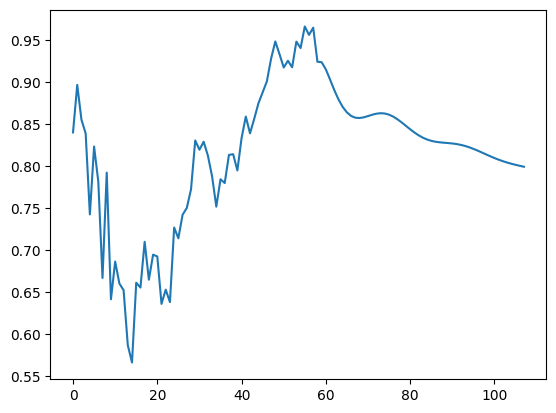

In [32]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

### Combined unscaled (original) plot

In [33]:
df3=scaler.inverse_transform(df3).tolist()

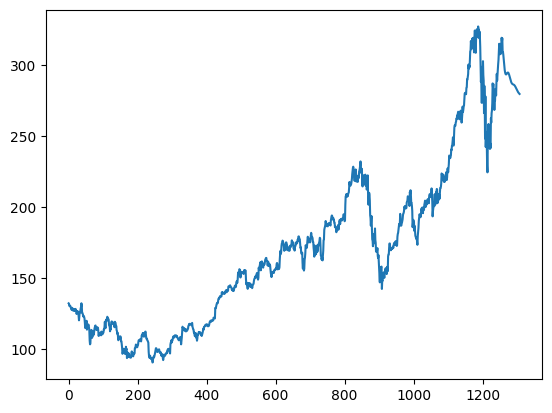

In [34]:
plt.plot(df3)